Import dataset and libraires

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Import the Dataset
training_set=pd.read_csv("/content/Google_Stock_Price_Train.csv")#Google Stock Price Dataset/training&testing
test_set=pd.read_csv("/content/Google_Stock_Price_Test.csv")
training_set.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


Data Information and Visualization

In [ ]:
#View all rows and Columns
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [ ]:
#Shape of data
print(training_set.shape)
print(test_set.shape)

(1258, 6)
(20, 6)


In [ ]:
#Data information
training_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


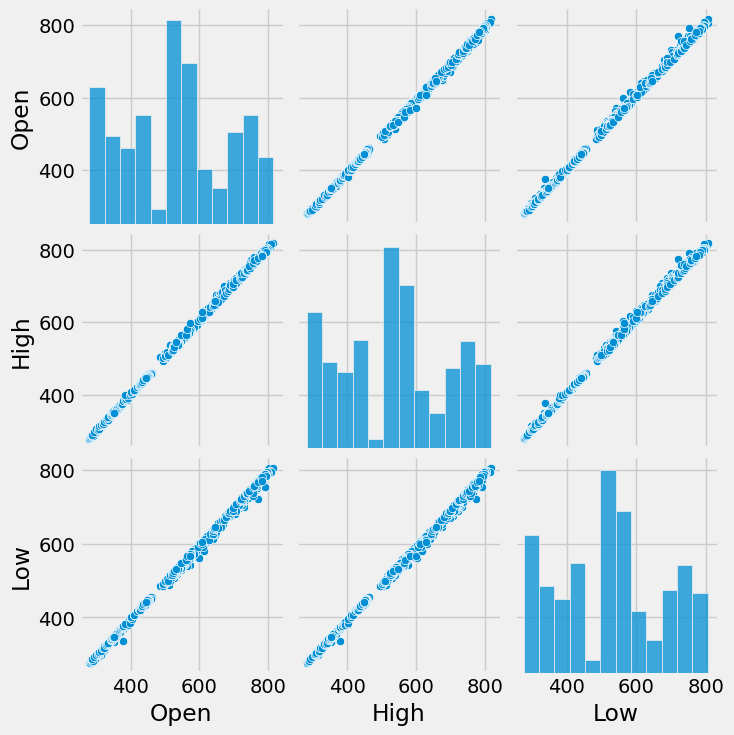

In [ ]:
#Visualizing the data distribution
plt.style.use('fivethirtyeight')
sns.pairplot(training_set)

Data preprocessing

In [ ]:
#Check missing values
training_set.isnull().sum()
test_set.isnull().sum()


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
#Access the open stock price column
training_set=training_set.iloc[: ,1:2].values
test_set=test_set.iloc[: ,1:2].values
training_set
test_set

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [ ]:
#Feature Scaling
sc=MinMaxScaler()
traning_set=sc.fit_transform(training_set)
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [ ]:
#Getting the input and output
x_train=training_set[0:1257]
y_train=training_set[0:1257]

In [ ]:
#Reshaping the input
print(f"Before Reshape{x_train.shape}")
x_train=np.reshape(x_train,(1257,1,1))
print(f"After Reshape{x_train.shape}")

Before Reshape(1257, 1)
After Reshape(1257, 1, 1)


Build the Model

In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

In [ ]:
#Import Libraires
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow.keras.losses import mean_squared_error


Build the LSTM model

In [ ]:
#Initialize the model
model=Sequential()

In [ ]:
#Adding the input and LSTM layer
model.add(LSTM(units=4,activation='sigmoid',input_shape=(None,1)))
#Adding the output layer
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam',loss='mse')

In [ ]:
#Fitting the RNN to the training set
model.fit(x_train,y_train,batch_size=32,epochs=200)

Epoch 1/200
40/40 [==============================] - 3s 6ms/step - loss: 306977.9062
Epoch 2/200
40/40 [==============================] - 0s 4ms/step - loss: 306892.7188
Epoch 3/200
40/40 [==============================] - 0s 5ms/step - loss: 306807.4688
Epoch 4/200
40/40 [==============================] - 0s 4ms/step - loss: 306722.3438
Epoch 5/200
40/40 [==============================] - 0s 4ms/step - loss: 306637.1562
Epoch 6/200
40/40 [==============================] - 0s 3ms/step - loss: 306552.1250
Epoch 7/200
40/40 [==============================] - 0s 3ms/step - loss: 306467.1562
Epoch 8/200
40/40 [==============================] - 0s 3ms/step - loss: 306382.0625
Epoch 9/200
40/40 [==============================] - 0s 4ms/step - loss: 306297.0312
Epoch 10/200
40/40 [==============================] - 0s 3ms/step - loss: 306211.9062
Epoch 11/200
40/40 [==============================] - 0s 3ms/step - loss: 306127.0625
Epoch 12/200
40/40 [==============================] - 0s 3ms/st

Making a predictions and visualize the result

In [ ]:
#Getting predictions and visuakization(test set)
#predictions
real_stock_price=test_set
inputs=real_stock_price
inputs=sc.transform(test_set) #Feature Scaling
inputs=np.reshape(inputs,(20,1,1)) #Reshape the data
predicted_stock_price=model.predict(inputs) #predictions

1/1 [==============================] - 0s 444ms/step


In [ ]:
#Visualization
#Inverse to the original scale
predicted_stock_price=sc.inverse_transform(predicted_stock_price)


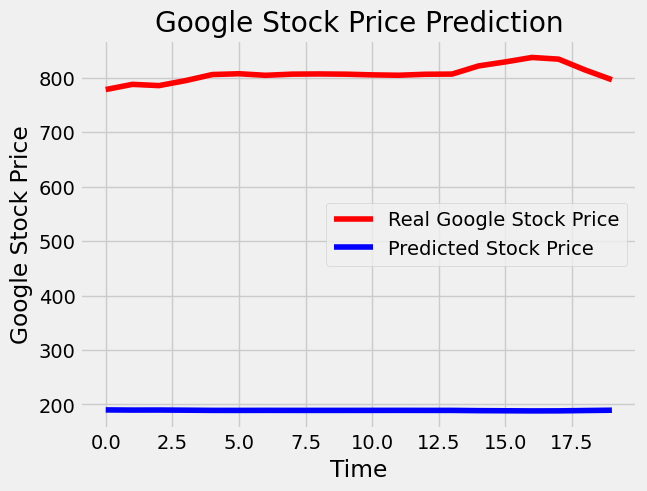

In [ ]:
#Visualize the result
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
#Getting predictions and Visualization(Training set)
#predictions
training_set=pd.read_csv('/content/Google_Stock_Price_Train.csv')#Dataset Google Stock Price(train)
training_set=training_set.iloc[:,1:2].values
real_stock_price=training_set
inputs=real_stock_price
inputs=sc.transform(inputs)
inputs=np.reshape(inputs,(1258,1,1))
predicted_stock_price=model.predict(inputs)


40/40 [==============================] - 1s 10ms/step


Visualization

In [ ]:
#Inverse to the original scale
predicted_stock_price=sc.inverse_transform(predicted_stock_price)


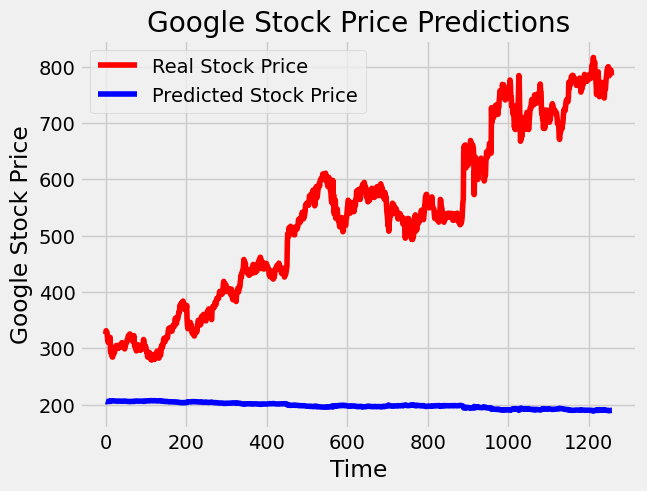

In [ ]:
#visualize the result
plt.plot(real_stock_price,color='red',label='Real Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Stock Price')
plt.title('Google Stock Price Predictions')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()